In [5]:
import pandas as pd
from faker import Faker
import random
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta, datetime
import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore", category=FutureWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("insurance_df.csv")
df

,Costumer_name,Costumer_age,Costumer_email,Costumer_address,Type_situation,Outcome_insurance,Days_to_fix,Active_user,Car_model,Year,Count_claims,Situation_Date,Costumer_id
0,Pietra da Conceição,22,erickda-paz@example.org,"Loteamento Lorena da Cunha, 13\nBoa União 1ª S...",Robbery,DENIED,102,0,Ford Explorer,2015.0,1,2022-08-14,1
1,Diogo da Luz,25,eloah95@example.net,"Lagoa de Pereira, 4\nSolimoes\n98010-073 Pinto...",Robbery,DENIED,99,0,Infiniti QX50,2023.0,1,2022-07-17,2
2,Maria Eduarda Duarte,22,maria-alicemonteiro@example.com,"Rua Leandro da Mata, 3\nMantiqueira\n98873299 ...",Robbery,APPROVED,85,1,Pagani Huayra BC,2016.0,1,2023-11-28,3
3,Luna das Neves,36,gomeskamilly@example.org,"Residencial Kamilly Aragão, 56\nBela Vitoria\n...",Collision,DENIED,7,0,Audi A4,2016.0,1,2023-10-24,4
4,Esther Santos,48,nicolascardoso@example.com,"Passarela Juan Moura, 2\nCabana Do Pai Tomás\n...",Natural Phenomena,NOT USED,2,0,Subaru Legacy,2019.0,1,2023-04-19,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,Paulo Santos,27,vcavalcanti@example.net,"Recanto de Pires, 20\nVila Copasa\n00389436 Al...",Robbery,APPROVED,78,1,SEAT Mii,2023.0,1,2022-04-08,2166
2534,Emanuella Azevedo,48,jesusana@example.net,Chácara João Pedro Pires\nVarzea Da Palma\n753...,Collision,NOT USED,68,1,Mercedes-Benz E-Class,2022.0,1,2022-02-14,2167
2535,Rafaela Moura,53,csilva@example.com,"Trecho de Santos, 17\nLagoinha\n04687-001 Silv...",Fire,DENIED,86,0,Honda Odyssey,2023.0,1,2023-06-27,2168
2536,Cauã Novaes,45,qfogaca@example.org,"Praça Correia, 75\nMaria Goretti\n42428-234 da...",Natural Phenomena,DENIED,86,1,Audi A4,2016.0,1,2022-06-28,2169


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Costumer_name      2538 non-null   object 
 1   Costumer_age       2538 non-null   int64  
 2   Costumer_email     2538 non-null   object 
 3   Costumer_address   2538 non-null   object 
 4   Type_situation     2538 non-null   object 
 5   Outcome_insurance  2538 non-null   object 
 6   Days_to_fix        2538 non-null   int64  
 7   Active_user        2538 non-null   int64  
 8   Car_model          2538 non-null   object 
 9   Year               2536 non-null   float64
 10  Count_claims       2538 non-null   int64  
 11  Situation_Date     2538 non-null   object 
 12  Costumer_id        2538 non-null   int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 257.9+ KB


In [8]:
df = df.fillna(0)
df['Year'] = df['Year'].astype(int)

In [9]:
missing_values = df.isnull().sum()
missing_values

Costumer_name        0
Costumer_age         0
Costumer_email       0
Costumer_address     0
Type_situation       0
Outcome_insurance    0
Days_to_fix          0
Active_user          0
Car_model            0
Year                 0
Count_claims         0
Situation_Date       0
Costumer_id          0
dtype: int64

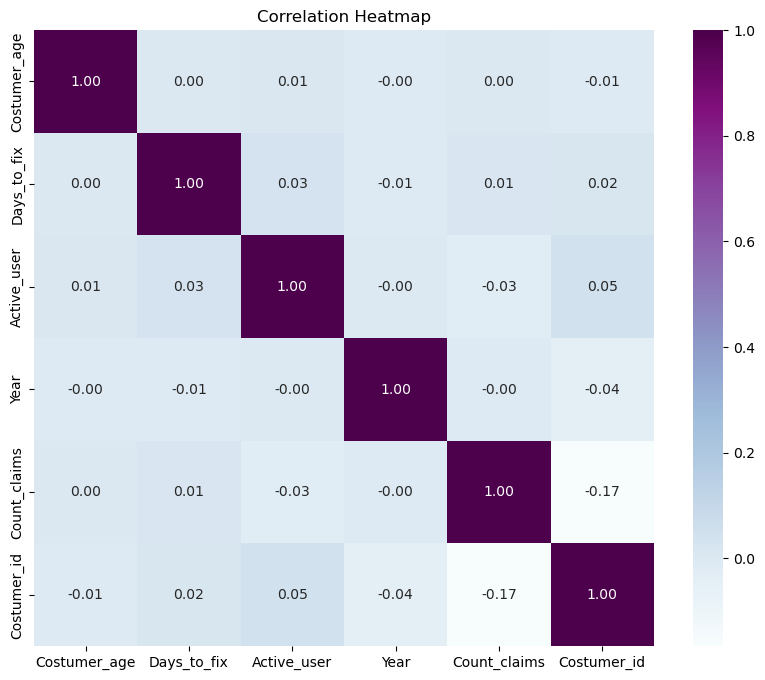

In [10]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

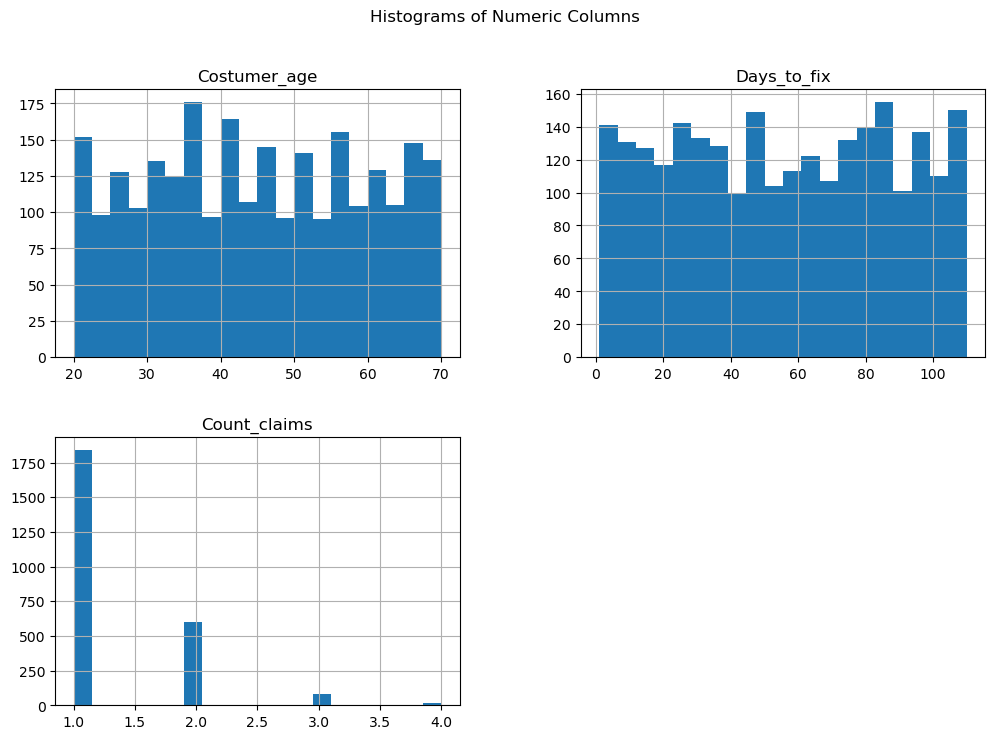

In [11]:
numeric_columns = ['Costumer_age', 'Days_to_fix', 'Count_claims']
df[numeric_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Numeric Columns')
plt.show()

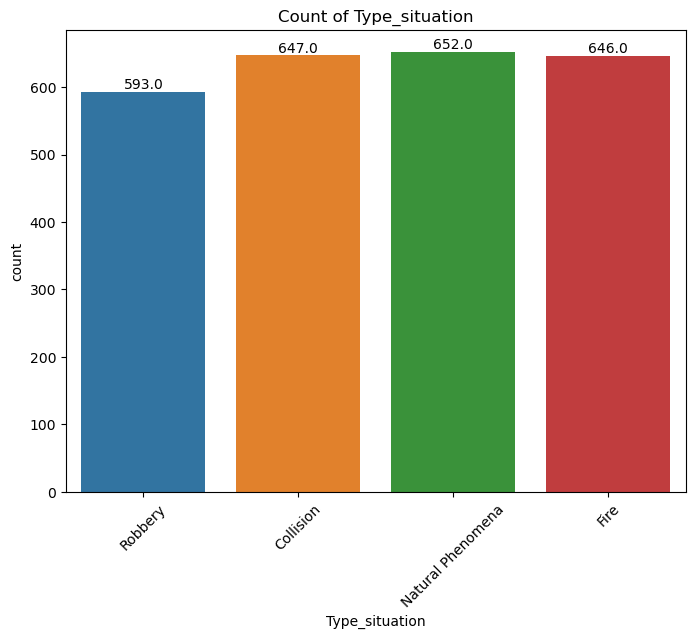

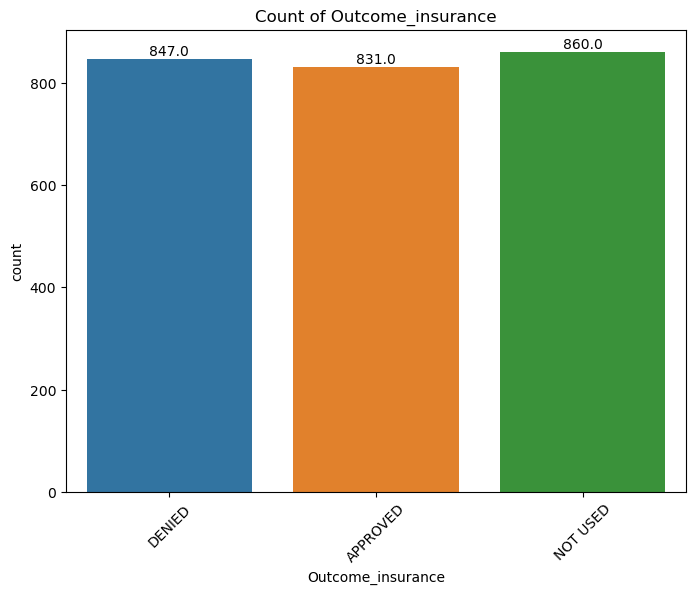

In [12]:
categorical_columns = ['Type_situation', 'Outcome_insurance']
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=df, x=column)
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45)
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')
    
    plt.show()

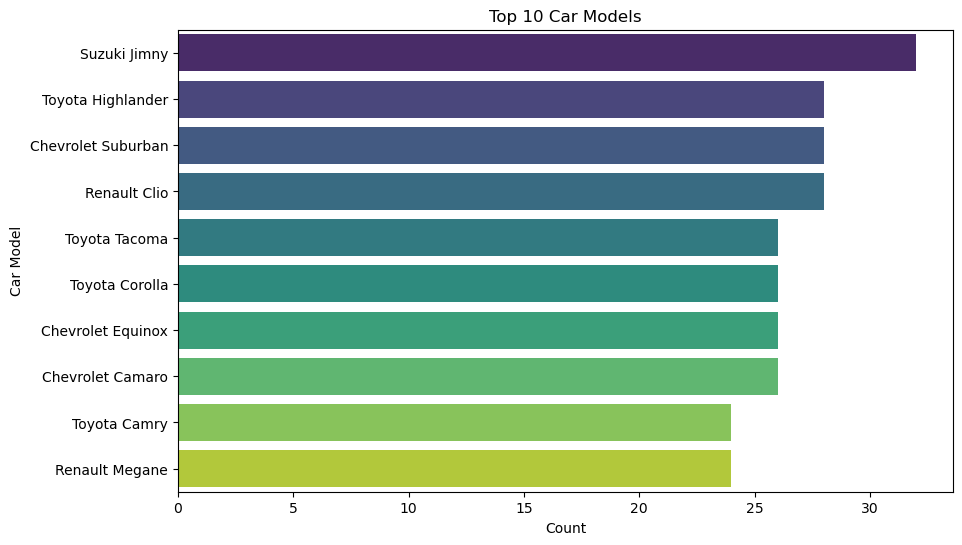

In [13]:
top_cars = df['Car_model'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cars.values, y=top_cars.index, palette='viridis')
plt.title('Top 10 Car Models')
plt.xlabel('Count')
plt.ylabel('Car Model')
plt.show()

In [14]:
df = df.drop(['Costumer_name','Costumer_email','Costumer_address'],axis=1)
df['Type_situation'] = pd.factorize(df['Type_situation'])[0] + 1
df['Outcome_insurance'] = pd.factorize(df['Outcome_insurance'])[0] + 1
df['Car_model'] = pd.factorize(df['Car_model'])[0] + 1

In [15]:

selected_features = ['Costumer_age', 'Type_situation', 'Days_to_fix', 'Car_model', 'Year', 'Count_claims','Outcome_insurance']

X = df[selected_features]
y = df['Active_user']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.59      0.63      0.61       134
           1       0.55      0.50      0.52       120

    accuracy                           0.57       254
   macro avg       0.57      0.57      0.57       254
weighted avg       0.57      0.57      0.57       254



In [16]:
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)

                   Importance
Days_to_fix          0.248974
Car_model            0.246413
Costumer_age         0.222244
Year                 0.127353
Type_situation       0.070276
Outcome_insurance    0.050240
Count_claims         0.034501
